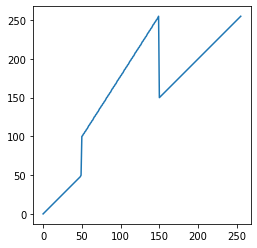

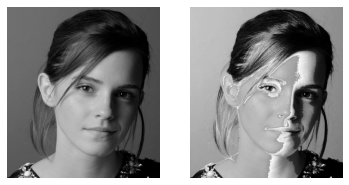

In [2]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image",f)
cv.waitKey(0)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
cv.imshow("Image",g)
cv.waitKey(0)
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
cv.destroyAllWindows()

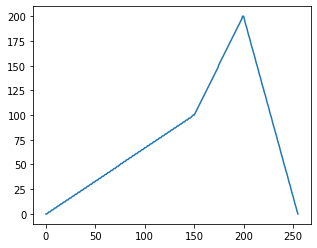

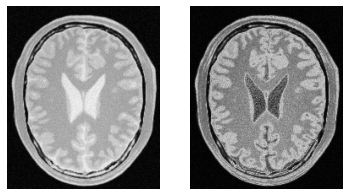

In [4]:
#Question 2 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,100,150)
t2 = np.linspace(100,200,50)
t3 = np.linspace(200,0,56)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image",f)
cv.waitKey(0)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
cv.imshow("Image",g)
cv.waitKey(0)
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
cv.destroyAllWindows()

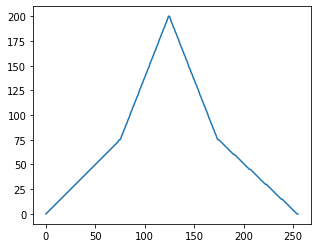

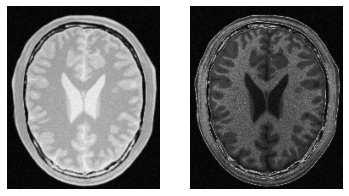

In [5]:
#Question 2 (b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,75,75)
t2 = np.linspace(75,200,50)
t3 = np.linspace(200,75,50)
t4 = np.linspace(75,0,81)

t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image",f)
cv.waitKey(0)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
cv.imshow("Image",g)
cv.waitKey(0)
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
cv.destroyAllWindows()

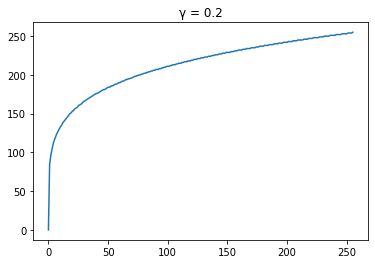

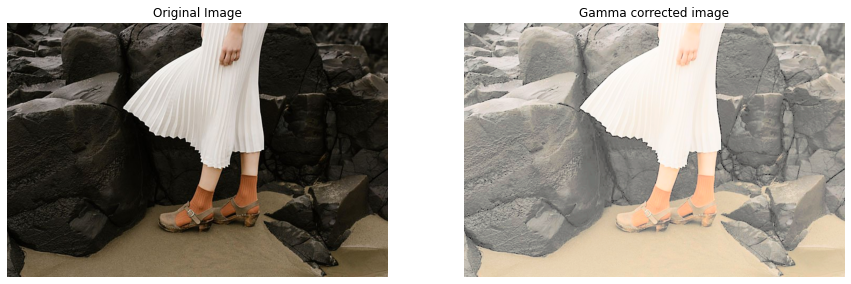

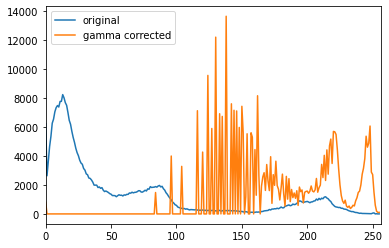

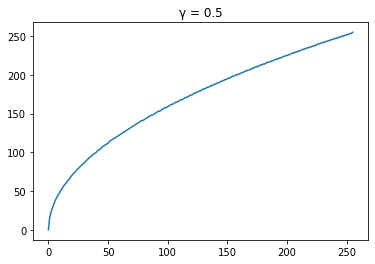

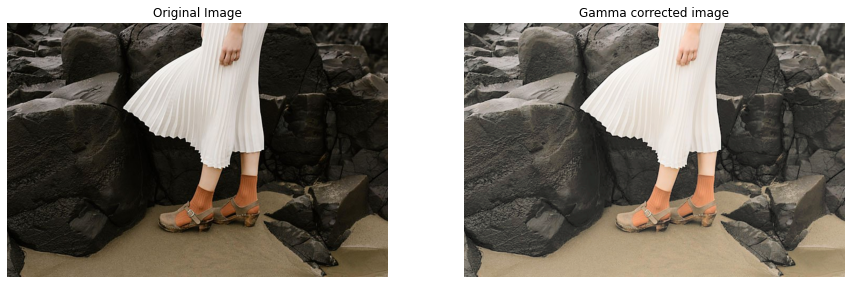

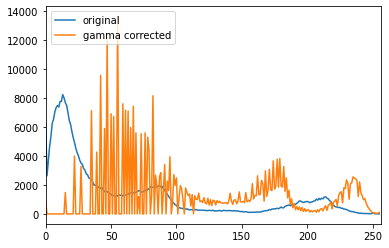

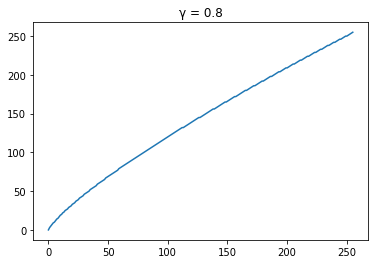

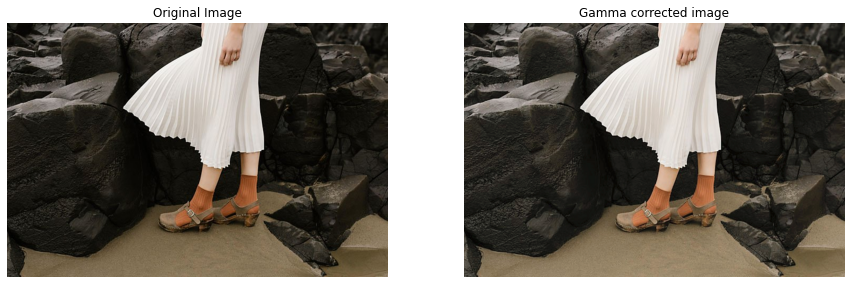

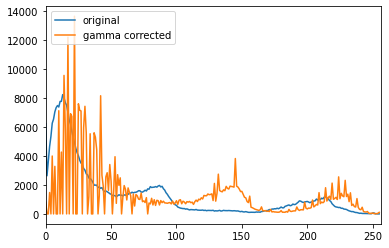

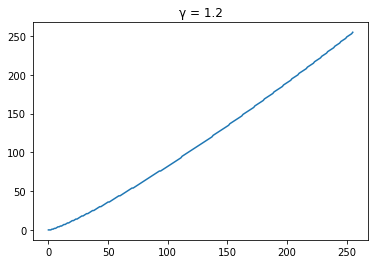

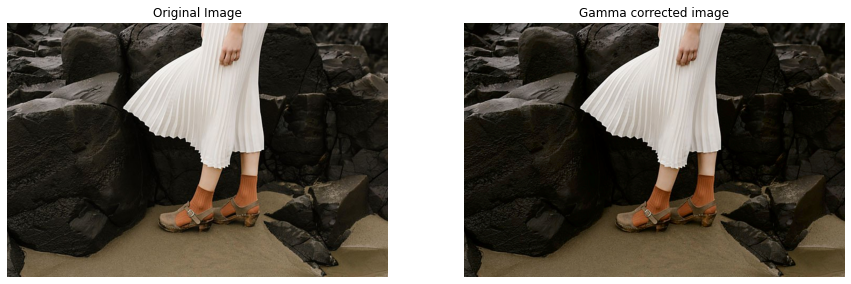

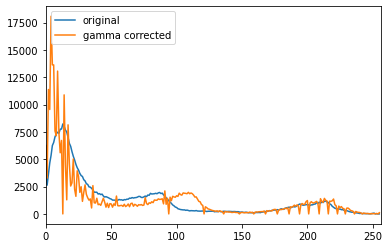

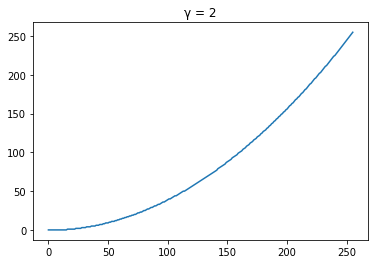

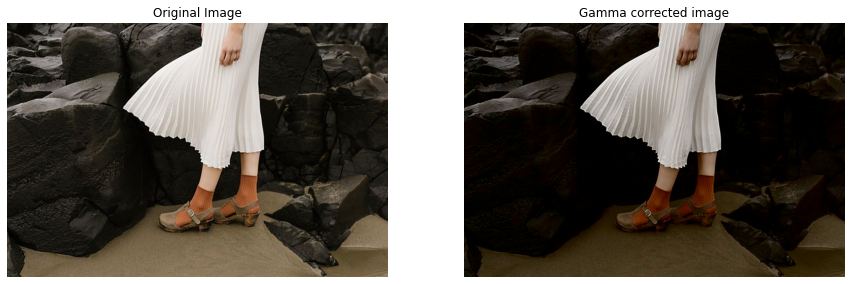

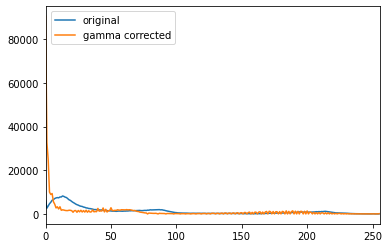

In [27]:
#Question 3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))

gamma = [0.2, 0.5, 0.8, 1.2, 2]
for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L,t)

    fig, ax = plt.subplots()
    ax.set_title("\u03B3 = "+ str(i))
    ax.plot(t)

    fig, ax = plt.subplots(1,2, figsize = (15,15))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    corrected_img = cv.merge([g, a, b])
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB))
    ax[1].set_title('Gamma corrected image')
    ax[1].axis('off')
    plt.show()

    hist1 = cv.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist1)
    plt.xlim([0,256])
    hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256])
    plt.plot(hist2)
    plt.xlim([0,256])
    plt.legend(('original','gamma corrected'),loc='upper left')
    plt.show()
